<a href="https://colab.research.google.com/github/SreehariSajith/DataAnalytics/blob/main/DataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Sreehari Sajith**


**Reg No.: 22MCS0013**

In [ ]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/ENB2012_data.csv')

**Data Cleaning**

In [ ]:
df.dropna()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,16.48,16.61


In [7]:
df = df.drop_duplicates()

In [8]:
print(df)

       X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28
..    ...    ...    ...     ...  ...  ...  ...  ...    ...    ...
764  0.62  808.5  367.5  220.50  3.5  2.0  0.4  5.0  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5  3.0  0.4  5.0  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5  4.0  0.4  5.0  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5  5.0  0.4  5.0  16.64  16.03
768   NaN    NaN    NaN     NaN  NaN  NaN  NaN  NaN    NaN    NaN

[769 rows x 10 columns]


**Feature Selection**

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
corr_matrix = df.corr()

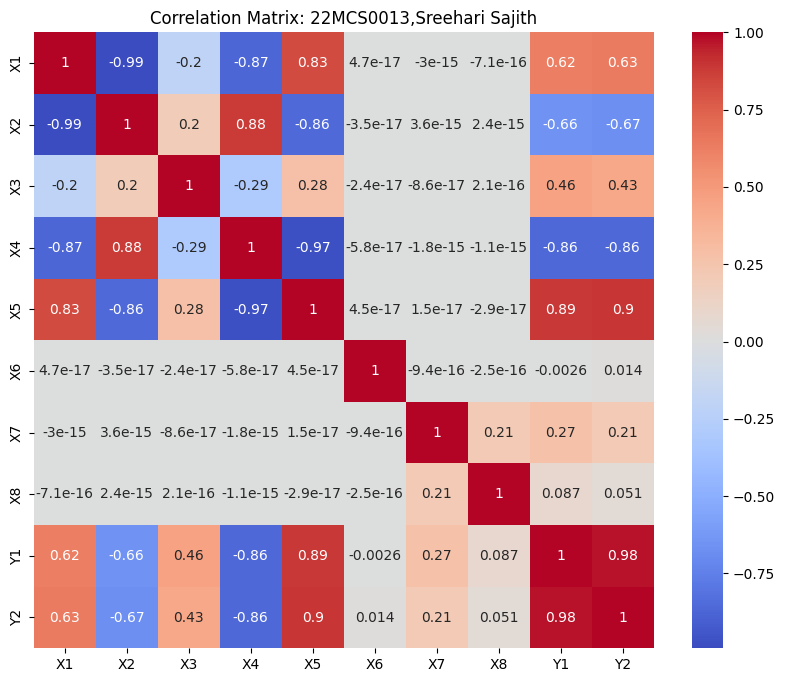

In [11]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: 22MCS0013,Sreehari Sajith')
plt.show()

In [12]:
selected_features = ['X1', 'X2', 'X3', 'X4', 'Y1']
df_selected = df[selected_features]


In [13]:
df_selected = df_selected.drop('X2', axis=1)


In [14]:
df.dropna(inplace=True)


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Split the dataset into features (X) and target variables (Y)
X = df.iloc[:, :-2]  # All columns except the last two (Y1 and Y2)
Y1 = df['Y1']

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, Y1)

# Get the feature importances
importance = model.feature_importances_

# Create a DataFrame to store the feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance ranking
print(feature_importance_df)


  Feature  Importance
1      X2    0.356170
3      X4    0.333762
0      X1    0.115256
6      X7    0.076154
4      X5    0.071224
2      X3    0.033839
7      X8    0.012855
5      X6    0.000740


In [16]:
# Feature Selection
selected_features = ['X1', 'X3', 'X4', 'Y1']
df_selected = df[selected_features]


In [17]:
print(selected_features)

['X1', 'X3', 'X4', 'Y1']




```
# This is formatted as code
```

**Feature elimination**

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Split the dataset into features (X) and target variables (Y)
X = df.iloc[:, :-2]  # All columns except the last two (Y1 and Y2)
Y1 = df['Y1']

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X, Y1)

# Get the feature importances
importance = model.feature_importances_

# Create a DataFrame to store the feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.05  # Adjust this threshold as needed

# Perform feature elimination by removing features with importance below the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

# Update the feature set
X_selected = X[selected_features]

# Print the selected features
print("Selected Features:")
print(X_selected.columns)


Selected Features:
Index(['X2', 'X4', 'X1', 'X7', 'X5'], dtype='object')


**Model Building**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_selected[['X1', 'X3', 'X4']]
Y = df_selected['Y1']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

**Scatter Plot**

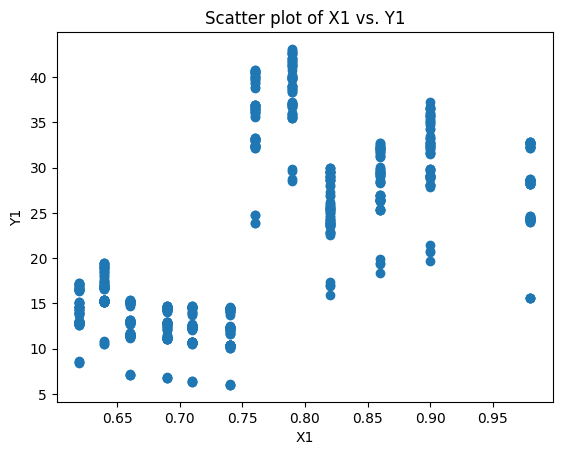

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_selected['X1'], df_selected['Y1'])
plt.xlabel('X1')
plt.ylabel('Y1')
plt.title('Scatter plot of X1 vs. Y1')
plt.show()

**Sns Pairplot**

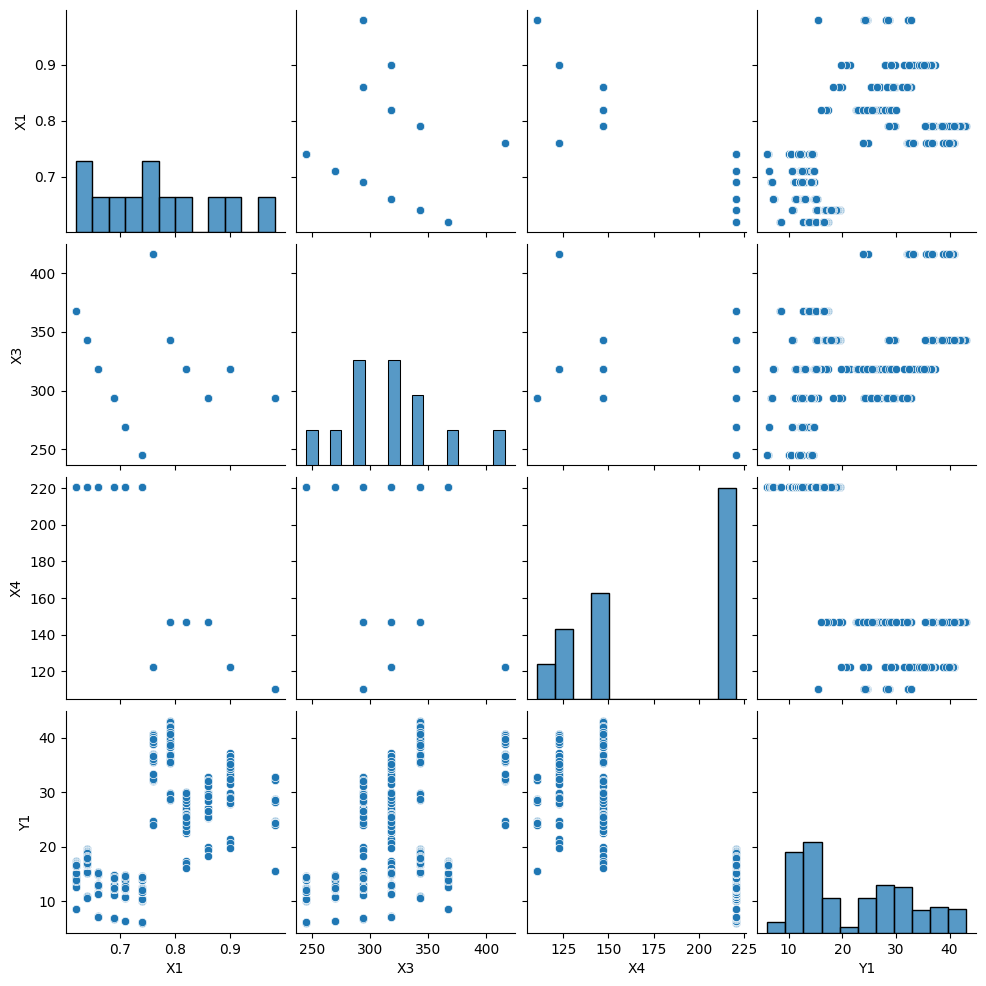

In [ ]:
import seaborn as sns
sns.pairplot(df_selected)

**Boxplots**

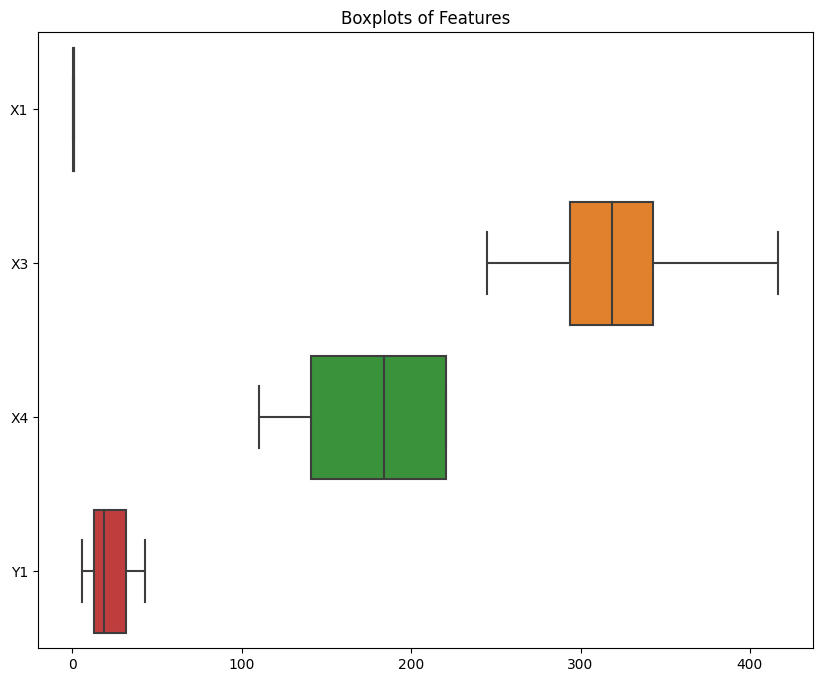

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_selected, orient='h')
plt.title('Boxplots of Features')
plt.show()

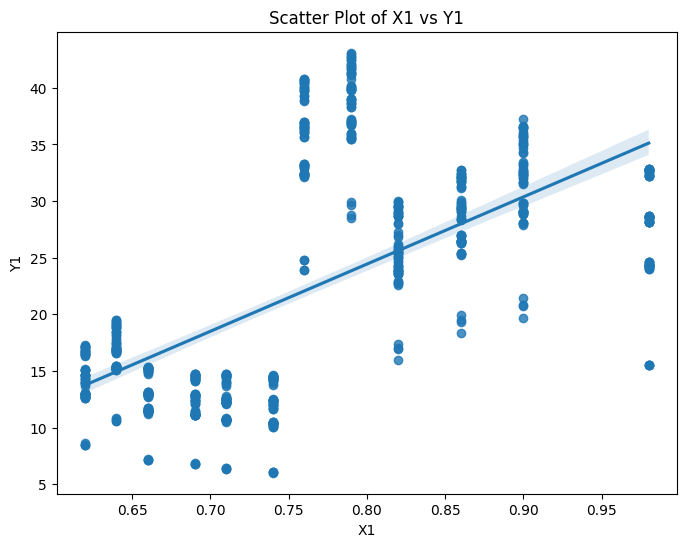

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.regplot(x='X1', y='Y1', data=df)
plt.title('Scatter Plot of X1 vs Y1')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.show()

**RESULT**

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (Y)
X = df.iloc[:, :-2]  # All columns except the last two (Y1 and Y2)
Y = df['Y1']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.24088222909090704
Mean Absolute Error (MAE): 0.3546480519480521
R-squared (R2) Score: 0.9976889700896121


In [ ]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)

# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = roc_curve(Y_test, Y_pred)

# Calculate area under the ROC curve (AUC)
auc = roc_auc_score(Y_test, Y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Print precision, recall, F1 score, accuracy, confusion matrix
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: ignored